In [2]:
library(ggplot2)

In [3]:
# 2. 모분포 N(μ, 3^2) 으로부터 얻은 단순 임의 표본 X_1, X_2, . . ., X_9 에 근거하여 모평균μ 를 추정하는 세가지 방법
# 1) (X_1 + X_9) / 9
# 2) (X_1 + 2*X_4 + X_9) / 4
# 3) (i:1 ~ 9Σ) / 9

# 단순 임의 표본이라는 가정이므로, 모집단을 잘 대표할수 있는 표본으로 보고
# (1) 세 가지 추정 방법 중에서 분산이 가장 작은 추정방법은 어떤 것인가?
















# (2) 세 가지 추정 방법 중에서 분산이 가장 작은 추정 방법은 어떤 것인가?
















# (3) μ = 2 일 때, 평균 제곱 오차가 가장 작은 추정방법은 어떤 것인가?















#

In [24]:
# 6. 유권자들의 모집단에서 1,000명을 단순랜덤표본으로 추출하여 조사하였더니,
# 어떤 정책을 600 명이 지지하는 것으로 나타났다. 이 경우 표본 비율의 표준오차는 약 0.015로 계산된다.
# 이제 표준오차를 0.005 로 줄이기 위해서는 표본의 크기를 얼마로 선택해야 하는가?

round(sqrt(0.60 * 0.40 / 1000), 3)

n <- (sqrt(0.60 * 0.40) / 0.005)^2
n

[1] 0.015

[1] 9600

[1] "(168.33961,171.66039)"

[1] "(168.01578,171.98422)"

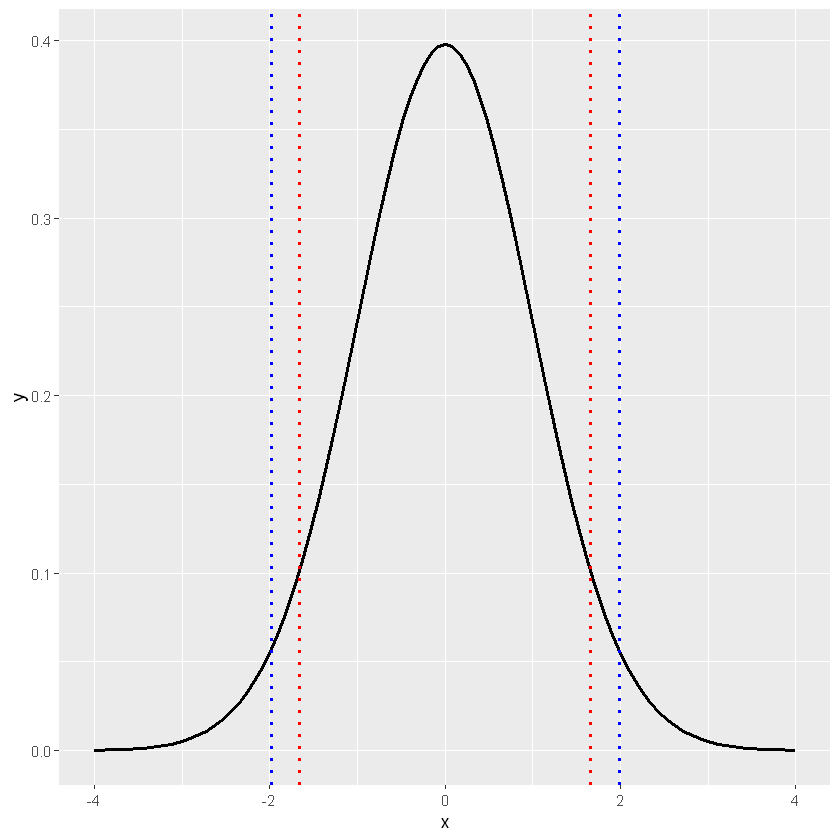

In [5]:
# 8. 어떤 집단에서 100명을 무작위로 추출한 결과, 키의 표본평균은 170Cm 이고 표준편차가 10cm 로 나타났다.
# 이 집단의 키가 정규분포를 따른다고 할 때,
n <- 100; x_mean <- 170; x_standard <- 10;

# 사실 샘플 수가 커서 z 를 사용해도 되지만,
# 모분산이 알려져 있지 않을 때 이므로 t 분포를 사용 하겠다.

# (1) 키의 모평균에 대한 90% 신뢰구간을 구하시오.
min90 <- x_mean + (qt(p = 0.10/2, df= n - 1, lower.tail = TRUE) * x_standard / sqrt(n))
max90 <- x_mean + (qt(p = 0.10/2, df= n - 1, lower.tail = FALSE) * x_standard / sqrt(n))
sprintf("%s%.5f%s%.5f%s",'(' ,min90 ,',' ,max90 ,')')

# (2) 키의 모평균에 대한 95% 신뢰구간을 구하시오.
min95 <- x_mean + (qt(p = 0.05/2, df= n - 1, lower.tail = TRUE) * x_standard / sqrt(n))
max95 <- x_mean + (qt(p = 0.05/2, df= n - 1, lower.tail = FALSE) * x_standard / sqrt(n))
sprintf("%s%.5f%s%.5f%s",'(' ,min95 ,',' ,max95 ,')')

ggplot(data.frame(x = c(-4, 4)), aes(x = x)) + stat_function(fun = dt, args = list(df = n - 1), size = 1) +
    geom_vline(xintercept = min90 - x_mean, linetype = 'dotted', color='red', size = 1) + 
    geom_vline(xintercept = max90 - x_mean, linetype = 'dotted', color='red', size = 1) + 
    geom_vline(xintercept = min95 - x_mean, linetype = 'dotted', color='blue', size = 1) + 
    geom_vline(xintercept = max95 - x_mean, linetype = 'dotted', color='blue', size = 1)

[1] "CI for λ : (12.68846,21.45368)"

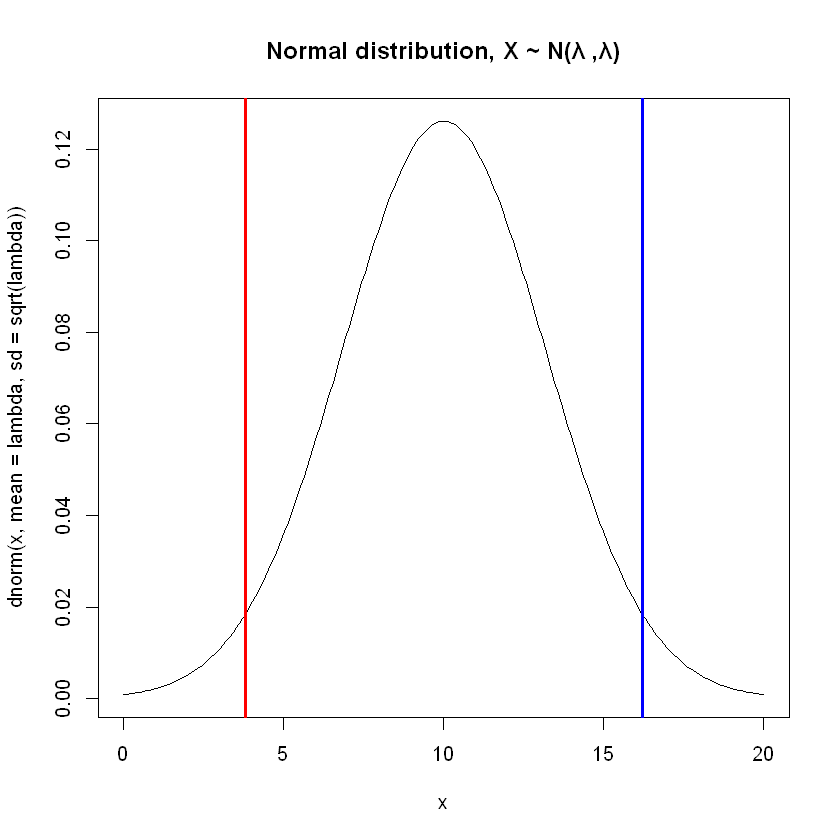

In [88]:
# 10. 포아송 분포를 따르는 모집단으로부터 구한 크기가 20인 랜덤표본의 합이 i : 1 ~ 20 ΣX_i  = 200 으로 주워졌을 때, 
# 정규근사 N(λ, λ) 를 활용하여 모수 λ에 대한 신뢰수준 95%의 신뢰구간을 구하시오.

sum <- 200; n <- 20

lambda <- sum/n

# 모분산이 알려져 있지 않을 때
CI_L <- lambda + (qnorm(p = 0.05/2, mean = lambda, sd = sqrt(lambda), lower.tail = TRUE) * sqrt(x_standard / n))
CI_R <- lambda + (qnorm(p = 0.05/2, mean = lambda, sd = sqrt(lambda), lower.tail = FALSE) * sqrt(x_standard / n))

sprintf("%s%s%.5f%s%.5f%s",'CI for λ : ','(' ,CI_L ,',' ,CI_R ,')')

x <- seq(-0, 20, length = 200)
plot(x, dnorm(x, mean = lambda, sd = sqrt(lambda)), type='l', main="Normal distribution, X ~ N(λ ,λ)")
abline(v = qnorm(p = 0.05/2, mean = lambda, sd = sqrt(lambda), lower.tail = TRUE), col="red", lwd=3)
abline(v = qnorm(p = 0.05/2, mean = lambda, sd = sqrt(lambda), lower.tail = FALSE), col="blue", lwd=3)

[1] 19.45283

[1] "(-7.39562,-2.60438)"

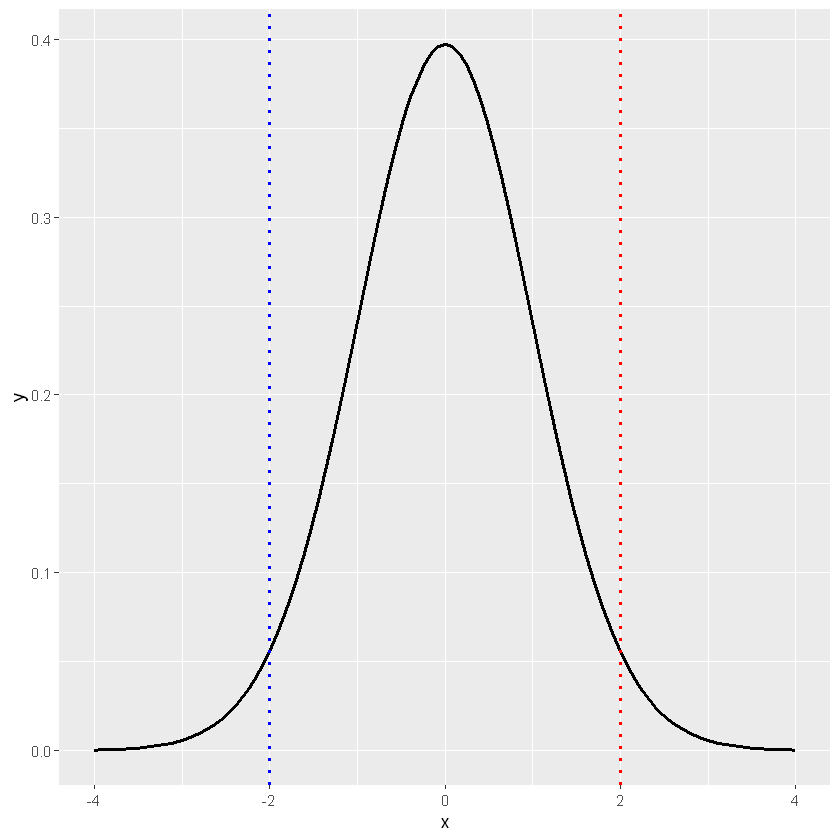

In [56]:
# 12. 정규 분포를 따르는 두개의 모집단의 평균을 비교하기 위해 크기가 30, 40 인 표본을 
# 각 모집단으로부터 랜덤 추출하여 다음과 같은 결과를 얻었다고 하자.

n <- 30; X_mean <- 240; S_X_sq <- 19;
m <- 25; Y_mean <- 245; S_Y_sq <- 20;

# (1) 두 모집단의 분산이 같다고 할 때, 공통된 분산을 추정하시오.

S_P_sq <- (((n - 1) * S_X_sq) + ((m - 1) * S_Y_sq)) / (n + m - 2)
round(S_P_sq, 5)

# (2) (1) 의 결과를 이용하여 두 모평균의 차이에 대해 신뢰 수준이 95% 인 신뢰구간을 구하시오.

CI_L <- (X_mean - Y_mean) + (qt(p = 0.025, df= n + m - 2, lower.tail = TRUE) * sqrt(S_P_sq) * sqrt(1/n + 1/m))
CI_R <- (X_mean - Y_mean) + (qt(p = 0.025, df= n + m - 2, lower.tail = FALSE) * sqrt(S_P_sq) * sqrt(1/n + 1/m))

sprintf("%s%.5f%s%.5f%s",'(' ,CI_L ,',' ,CI_R ,')')

# T ~ t(n) 일때, P[T > T_α(n)] = α 를 만족하는 t_α(n)의 값을 표시.
# qt(p = 0.05, df = 1, lower.tail = FALSE)

ggplot(data.frame(x = c(-4, 4)), aes(x = x)) + 
    stat_function(fun = dt, args = list(df = n + m - 2), size = 1) + 
    geom_vline(xintercept = qt(p = 0.05/2, df= n + m - 2, lower.tail = TRUE)
               , linetype = 'dotted', color='blue', size = 1) +
    geom_vline(xintercept = qt(p = 0.05/2, df= n + m - 2, lower.tail = FALSE)
               , linetype = 'dotted', color='red', size = 1)

[1] "(2.12903,14.99784)"

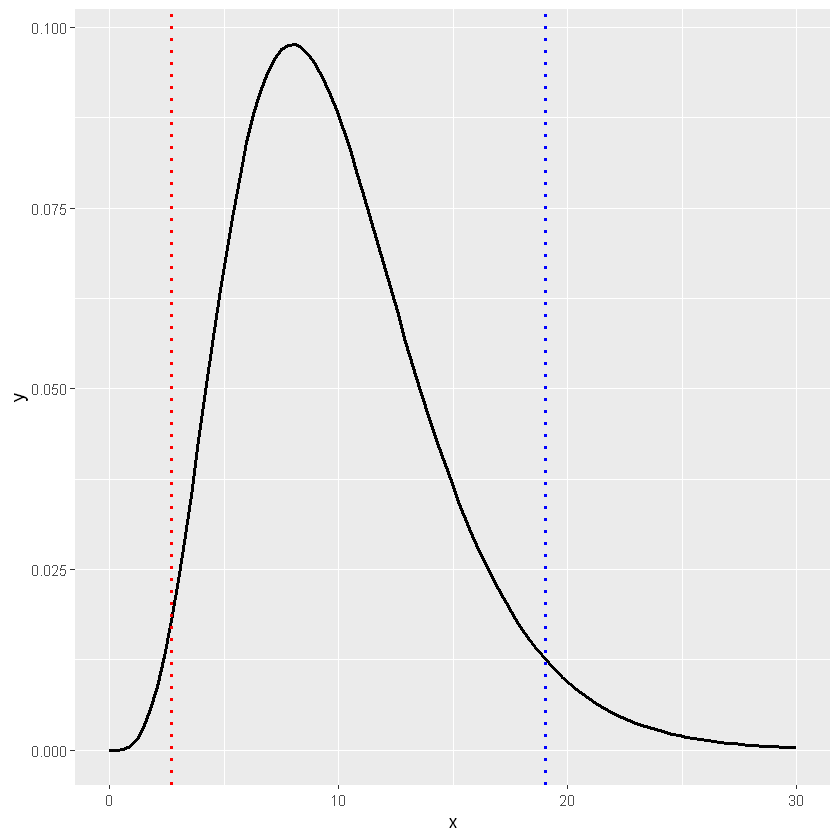

In [55]:
# 14. 어떤 제조라인에서 랜덤 추출한 제품 10개의 중량의 분산이 4.5 였다.
# 제품의 중량은 정규분포를 따른다고 할 때, 모분산 에 대한 신뢰수준이 95%인 신뢰 구간을 구하시오.

n <- 10; s_sq <- 4.5

# 모평균이 알려져 있지 않은 경우의 신뢰 구간
CI_L <- (s_sq * (n - 1)) / qchisq(p = 0.05/2, df = n - 1, lower.tail = FALSE)
CI_R <- (s_sq * (n - 1)) / qchisq(p = 0.05/2, df = n - 1, lower.tail = TRUE)

sprintf("%s%.5f%s%.5f%s",'(' ,CI_L ,',' ,CI_R ,')')

ggplot(data.frame(x = c(0,30)), aes(x = x)) +
    stat_function(fun = dchisq, args = list(df = n), size = 1) +
    geom_vline(xintercept = qchisq(p = 0.05/2, df = n - 1, lower.tail = FALSE)
               , linetype = 'dotted', color='blue', size = 1) +
    geom_vline(xintercept = qchisq(p = 0.05/2, df = n - 1, lower.tail = TRUE)
               , linetype = 'dotted', color='red', size = 1)